#Clustering

It refers to the task of partioning the dataset into groups, called clusters. This partion is done in a way that elements in the same cluster are similar and elements of the different clusters are different.

There are a number of clustering techniques, one of them is k-means. In this module we will see how to use k-means on a real world dataset.

k-means clustering helps in coming up with k-clusters (groups) in an unlabelled dataset.

The following steps are included in the algorithm-


1.   Start with k data points (centroid)
2.   Find the distance of all the points from these centroids.
3. Allocate all to points to 1 group that are closer to a particular centroid forming k-clusters
4. Recompute the centroid for each cluster.
5. Repeat 3 and 4 till until the distance between the old clusters and new clusters is constant.



### Using k-means for artificial data.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#importing libraries
import statistics

from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
#generating the artificial dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers=3,cluster_std=0.5, random_state=0)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=42)

In [14]:
#pre-processing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

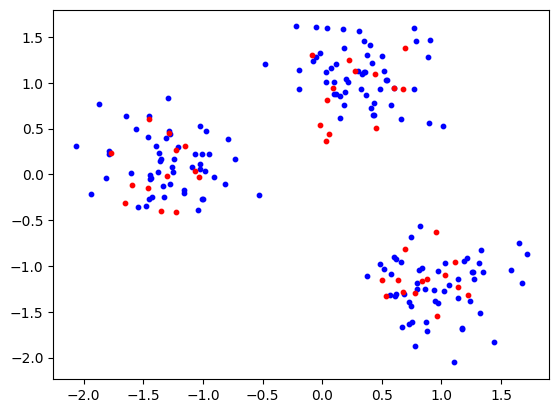

In [22]:
# plotting the data
plt.scatter(scaled_X_train[:, 0], scaled_X_train[:, 1], s=10, color= "blue")
plt.scatter(scaled_X_test[:, 0], scaled_X_test[:, 1], s=10, color= "red")
plt.show()

# Randomly Initialize KMeans

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random",n_clusters=3,n_init=50,max_iter=500,random_state=0)

In [23]:
kmeans.fit(scaled_X_train)

KMeans(init='random', max_iter=500, n_clusters=3, n_init=50, random_state=0)

In [24]:
# The SSE value
print(kmeans.inertia_)

30.77528153413893


In [27]:
kmeans.labels_

array([2, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2,
       0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1,
       2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 1,
       0, 0, 1, 2, 1, 2, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2,
       0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0,
       1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0,
       0, 1, 0, 1, 1, 2], dtype=int32)

In [26]:
kmeans.predict(scaled_X_train)

array([2, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2,
       0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1,
       2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 1,
       0, 0, 1, 2, 1, 2, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2,
       0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0,
       1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0,
       0, 1, 0, 1, 1, 2], dtype=int32)

In [28]:
kmeans.predict(scaled_X_test)

array([0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 2, 0, 2, 1, 1,
       1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 0, 0, 1], dtype=int32)

In [30]:
silhouette_score(scaled_X_train, kmeans.labels_)  # [-1 ,  +1]

0.7266682309365822

In [31]:
silhouette_score(scaled_X_test, kmeans.predict(scaled_X_test))  # [-1 ,  +1]

0.7403504910905887

In [32]:
cluster_0 = scaled_X_train[kmeans.predict(scaled_X_train) == 0]
cluster_1 = scaled_X_train[kmeans.predict(scaled_X_train) == 1]
cluster_2 = scaled_X_train[kmeans.predict(scaled_X_train) == 2]

In [37]:
cluster_test_0 = scaled_X_test[kmeans.predict(scaled_X_test) == 0]
cluster_test_1 = scaled_X_test[kmeans.predict(scaled_X_test) == 1]
cluster_test_2 = scaled_X_test[kmeans.predict(scaled_X_test) == 2]

In [35]:
C = kmeans.cluster_centers_
C

array([[ 0.3108096 ,  1.09231842],
       [ 0.97449933, -1.2298477 ],
       [-1.29117327,  0.1169195 ]])

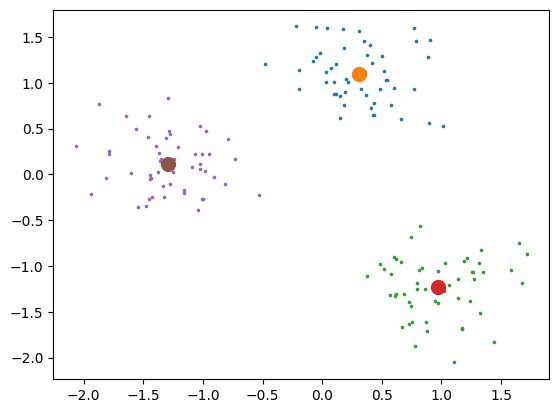

In [43]:
plt.scatter(cluster_0[:, 0], cluster_0[:, 1], s=10,marker = ".")
plt.scatter(C[0, 0], C[0, 1], s=100,marker = "o" )

plt.scatter(cluster_1[:, 0], cluster_1[:, 1], s=10,marker = ".")
plt.scatter(C[1, 0], C[1, 1], s=100,marker = "o")

plt.scatter(cluster_2[:, 0], cluster_2[:, 1], s=10,marker = ".")
plt.scatter(C[2, 0], C[2, 1], s=100,marker = "o")

plt.show()

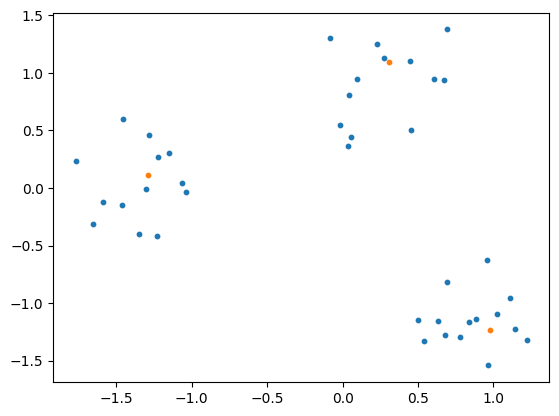

In [45]:
# The three centroids in this case
C=kmeans.cluster_centers_

# plotting them with data
plt.scatter(scaled_X_test[:, 0], scaled_X_test[:, 1], s=10)
plt.scatter(C[:, 0], C[:, 1], s=10)
plt.show()

# Kmeans++
- Initialization is in a probabilistic method

In [50]:
# This is just for understanding working of kmeans++ initialization
# Calculate seeds from k-means++
from sklearn.cluster import kmeans_plusplus
centers_init, indices = kmeans_plusplus(scaled_X_train, n_clusters=3, random_state=0)

In [51]:
centers_init

array([[ 0.41963574,  1.22017183],
       [ 0.68520986, -1.30139909],
       [-0.98109646,  0.03462869]])

In [52]:
indices

array([47, 80, 46])

In [56]:
scaled_X_train[indices]

array([[ 0.41963574,  1.22017183],
       [ 0.68520986, -1.30139909],
       [-0.98109646,  0.03462869]])

# Kmeans++ Initialization

In [53]:
kmeans = KMeans(init="k-means++",n_clusters=3,n_init=50,max_iter=500,random_state=0)

In [54]:
kmeans.fit(scaled_X_train)

KMeans(max_iter=500, n_clusters=3, n_init=50, random_state=0)

In [55]:
kmeans.cluster_centers_

array([[ 0.3108096 ,  1.09231842],
       [ 0.97449933, -1.2298477 ],
       [-1.29117327,  0.1169195 ]])

#Elbow plot

In [58]:
sse = []

for k in range(1,10):
  kmeans = KMeans(n_clusters= k , init="k-means++", n_init='auto')
  kmeans.fit(scaled_X_train)
  sse.append(kmeans.inertia_)

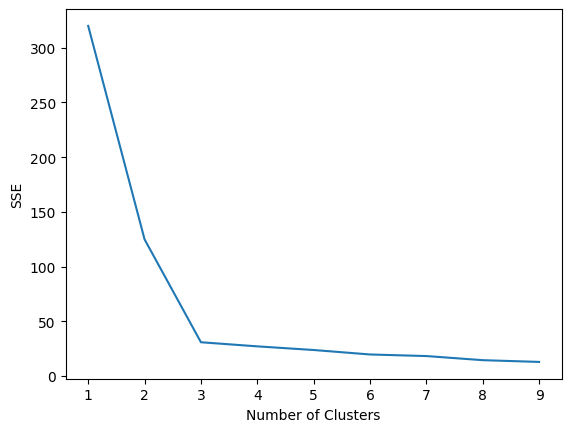

In [59]:
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

From the chart above it can be observed that the elbow is formed at n=3, hence the optimal number of clusters should be 3

There is another way to identify the optimal number of clusters and that is through a measure called silhouette coefficient. This coefficient clusters the points using two parameters-

1.   Proximity of points in the same clusters
2.   The remoteness of points in different clusters.

The range of this coefficient is from -1 to 1. Higher score implis that the data points are closer to their centroids.



In [60]:
sil_coef = []
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, n_init='auto')
  kmeans.fit(scaled_X_train)
  score = silhouette_score(scaled_X_train, kmeans.labels_)
  sil_coef.append(score)

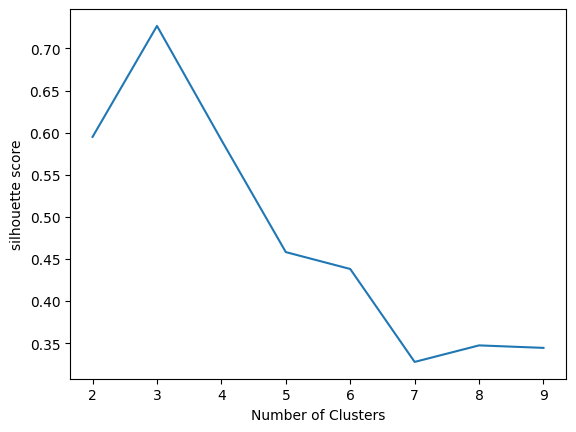

In [61]:
plt.plot(range(2, 10), sil_coef)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette score")
plt.show()

Since the sil_coef obtains maximum value for n=3, hence we choose k=3.

### Real data set

In [62]:
from sklearn.datasets import load_digits
X,y = load_digits(return_X_y=True)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
#Identifying the correct number of clusters

sse_digit = []
for k in range(1,12):
  kmeans = KMeans(n_clusters=k,n_init="auto")
  kmeans.fit(X_train)
  sse_digit.append(kmeans.inertia_)

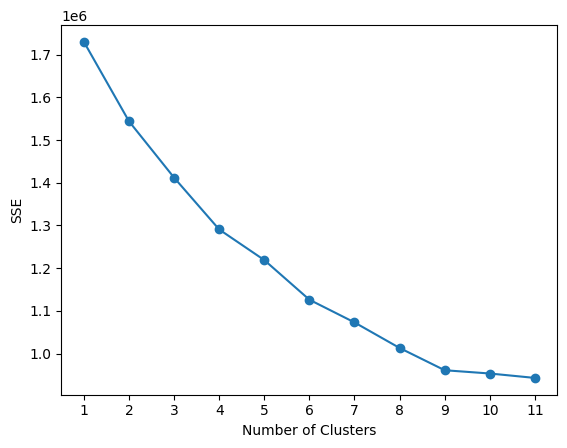

In [67]:
plt.plot(range(1, 12), sse_digit)
plt.scatter(range(1, 12), sse_digit)
plt.xticks(range(1, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

NO clear elbow is seen

In [68]:
sil_coef_digits = []
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k,n_init="auto")
  kmeans.fit(X_train)
  score = silhouette_score(X_train, kmeans.labels_)
  sil_coef_digits.append(score)

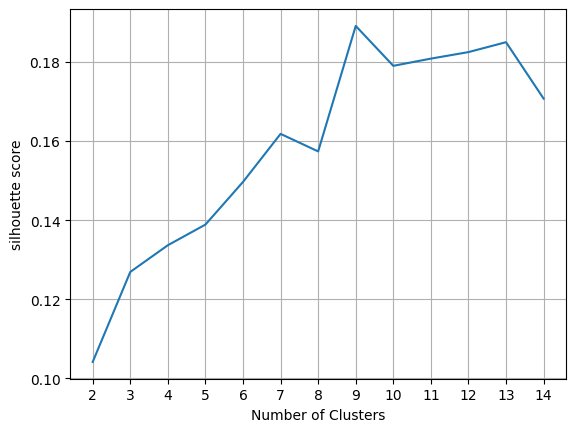

In [69]:
plt.plot(range(2, 15), sil_coef_digits)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette score")
plt.grid(True)
plt.show()

In [70]:
# get the value of K for which
# sillhoutte coefficient is highest
print(np.argmax(sil_coef_digits)+2)

9


This graph points the fact that n=9 this could be because some of the digits like 1 and 7 make have striking similarity.

In [ ]:
# k-means for k=10 as there are 10 digits

kmeans = KMeans(n_clusters=10, **kmeans_kwargs)
kmeans.fit(digits.data)

# obtaining centroids
C_digit=kmeans.cluster_centers_


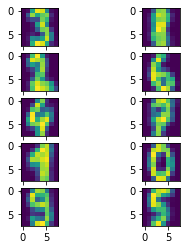

In [ ]:
# displaying centroids
fig, ax = plt.subplots(5, 2, figsize=(4, 4))
C_digit_reshaped=C_digit.reshape(10,8, 8)
for i,j in zip(ax.flat, C_digit_reshaped):

  i.imshow(j)

In [ ]:
#model evaluation
labels=np.zeros_like(digits.target)
for i in range(10):
  c=(kmeans.labels_==i)
  labels[c]=(statistics.mode(digits.target[c]))
print(accuracy_score(digits.target, labels))
#confusion matrix
c_m = confusion_matrix(digits.target, labels)
print(c_m)

0.7924318308291597
[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   7   0   0 162   0   0   9   3   0]
 [  0   0   0   0   2 136   1   0   0  43]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   0   0 175   2   0]
 [  0   6   3   2   0   4   2   5 101  51]
 [  0  20   0   6   0   6   0   7   2 139]]
